In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf

import graphviz 
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import mean_squared_error 
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans



import matplotlib.cm as cm 
from mpl_toolkits import mplot3d
from sklearn.decomposition import PCA




%matplotlib inline

In [5]:
#import df
df = pd.read_csv('SmashStats.csv')
#delete rows with missing values 
df = df.dropna()
#display first 5 rows
df.head(50)

,character,weight,full_hop,short_hop,air_hop,grab_range,dash_speed,run_speed,quickest_move,2nd_quickest_move,projectile(s),series
1,Bayonetta,81,39.0000,21.35,42.00,12.5,1.936000,1.760000,up_b,front_air,yes,Ind.
2,Bowser,135,33.0000,15.70,32.61,20.0,2.255000,1.971000,up_b,side_b,yes,Super Mario
3,Bowser Jr.,108,34.4000,16.59,34.40,18.0,1.760000,1.566000,up_smash,up_air,yes,Super Mario
5,Captain Falcon,104,37.3100,17.98,37.31,13.0,1.980000,2.552000,neutral_air,back_air,no,Ind.
6,Charizard,116,32.0000,15.43,36.00,21.4,2.288000,2.200000,up_smash,up_b,yes,Pokemon
7,Chrom,95,30.9700,13.00,28.00,14.2,2.200000,2.145000,up_air,neutral_air,no,Fire Emblem
8,Cloud,100,32.5000,17.00,32.50,12.0,2.145000,2.167000,up_b,neutral_air,yes,Final Fantasy VII
9,Corrin,98,33.0000,16.00,31.00,11.8,1.892000,1.595000,neutral_air,up_air,yes,Fire Emblem
10,Daisy,89,30.0300,14.50,30.03,12.0,1.826000,1.595000,up_b,neutral_air,yes,Super Mario
11,Dark Pit,96,31.0000,14.96,31.00,13.0,2.090000,1.828000,up_smash,neutral_air,yes,Kid Icarus


Text(-57.95, 0.5, 'Character Weight')

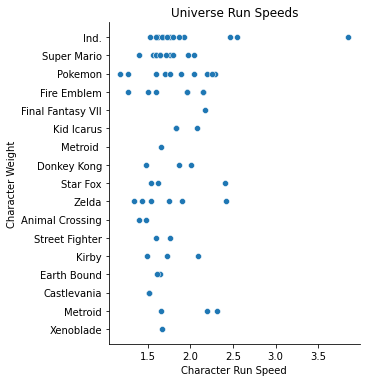

In [8]:
sns.relplot(x = 'run_speed', y='series', data=df)
plt.title('Universe Run Speeds')
plt.xlabel('Character Run Speed')
plt.ylabel('Character Weight')

Text(3.674999999999997, 0.5, 'Character Weight')

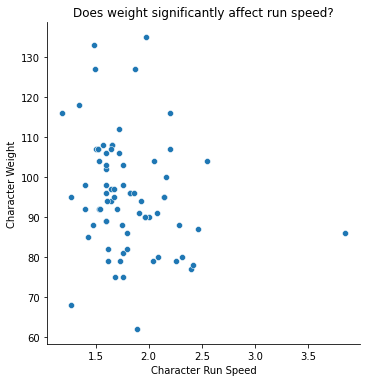

In [9]:
sns.relplot(x = 'run_speed', y='weight', data=df)
plt.title('Does weight significantly affect run speed?')
plt.xlabel('Character Run Speed')
plt.ylabel('Character Weight')

Text(0.5, 1.0, 'Character Universe')

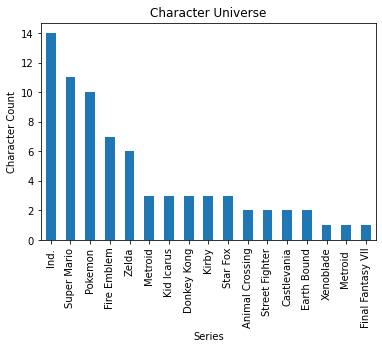

In [10]:
df['series'].value_counts().plot.bar()
plt.xlabel("Series")
plt.ylabel("Character Count")
plt.title("Character Universe")

Text(0.5, 1.0, 'Quickest Move')

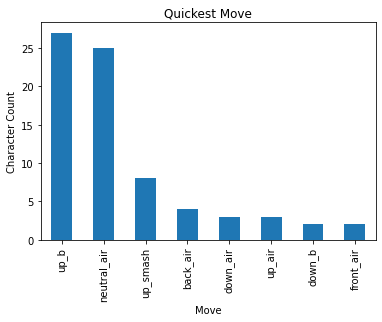

In [11]:
df['quickest_move'].value_counts().plot.bar()
plt.xlabel("Move")
plt.ylabel("Character Count")
plt.title("Quickest Move")

Text(0.5, 1.0, 'Grab Range Distribution')

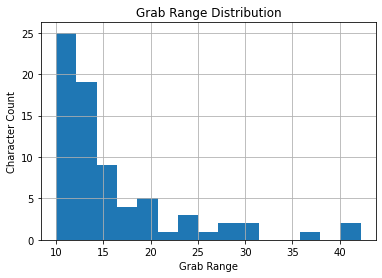

In [12]:
df["grab_range"].hist(bins = 15)
plt.xlabel("Grab Range")
plt.ylabel("Character Count")
plt.title("Grab Range Distribution")

Text(0.5, 1.0, 'Projectile Capabilities')

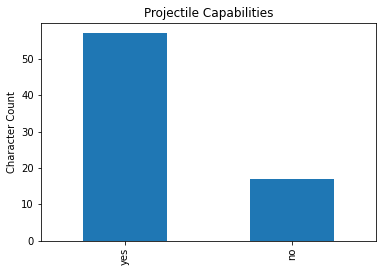

In [13]:
df['projectile(s)'].value_counts().plot.bar()
plt.ylabel("Character Count")
plt.title("Projectile Capabilities")

In [14]:
# Model 1 

In [15]:
# b) Prepare your data for machine learning and split your data into training and testing data.

In [16]:
df2 = pd.get_dummies(df, columns = ['quickest_move', 'projectile(s)', '2nd_quickest_move'], drop_first = True)
del df2['character']
del df2['series']
x = df2.drop(columns = 'grab_range')
y = df2['grab_range']

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [18]:
# c) Fit a model to your training data.

In [19]:
tree3 = DecisionTreeRegressor(max_depth = 3) 
tree3.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [20]:
# d) Evaluate the fit of your model using your testing and training data.  You should use the appropriate methods for your model.

In [21]:
train_preds3 = tree3.predict(x_train)
mean_squared_error(train_preds3,y_train)

13.337944444444444

In [22]:
test_preds3 = tree3.predict(x_test)
mean_squared_error(test_preds3,y_test)

79.24491526748973

In [23]:
# e) Repeat steps (c) and (d) with at least two different parameters for your model. 

In [24]:
tree5 = DecisionTreeRegressor(max_depth = 5) 
tree5.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [25]:
train_preds5 = tree5.predict(x_train)
mean_squared_error(train_preds5,y_train)

4.103039034411916

In [26]:
test_preds5 = tree5.predict(x_test)
mean_squared_error(test_preds5,y_test)

50.65743958371595

In [27]:
tree7 = DecisionTreeRegressor(max_depth = 7) 
tree7.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [28]:
train_preds7 = tree7.predict(x_train)
mean_squared_error(train_preds7,y_train)

0.1871949152542373

In [29]:
test_preds7 = tree7.predict(x_test)
mean_squared_error(test_preds7,y_test)

102.11094

In [30]:
#model = DecisionTreeRegressor(max_depth = 3)
#model.fit(x_train, y_train)
#fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20), dpi =500)
#plot_tree(model, feature_names = x.columns)

In [31]:
##############################

In [32]:
# a) Fit a different type of model from Step 8 on  to your training data.

In [50]:
knn7 = KNeighborsRegressor(n_neighbors = 7)
knn7.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=7)

In [51]:
# d) Evaluate the fit of your 2nd model using your testing and training data.  You should use the appropriate methods for your model.

In [52]:
y_test_pred7 = knn7.predict(x_test)
mean_squared_error(y_test_pred7,y_test)

56.17122448979591

In [53]:
y_train_pred7 = knn7.predict(x_train)
mean_squared_error(y_train_pred7,y_train)

34.1393358699412

In [54]:
# e) Repeat steps (c) and (d) with at least two different parameters for your 2nd model. 

In [55]:
knn35 = KNeighborsRegressor(n_neighbors = 35)
knn35.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=35)

In [56]:
y_test_pred35 = knn35.predict(x_test)
mean_squared_error(y_test_pred35,y_test)

50.274208979591826

In [57]:
y_train_pred35 = knn35.predict(x_train)
mean_squared_error(y_train_pred35,y_train)

44.297792736077476

In [58]:
knn21 = KNeighborsRegressor(n_neighbors = 21)
knn21.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=21)

In [59]:
y_test_pred21 = knn21.predict(x_test)
mean_squared_error(y_test_pred21,y_test)

48.67509448223735

In [60]:
y_train_pred21 = knn21.predict(x_train)
mean_squared_error(y_train_pred21,y_train)

40.43590453130404

In [44]:
#########

In [61]:
scaler = MinMaxScaler()

In [62]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.fit_transform(x_test)

In [63]:
knn_scaled = KNeighborsRegressor(n_neighbors = 35)
knn_scaled.fit(x_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=35)

In [64]:
y_test_scaled_pred = knn_scaled.predict(x_test_scaled)

In [65]:
mean_squared_error(y_test_scaled_pred, y_test)

43.13409142857144

In [ ]:





Project Milestone 3 below 






In [28]:
x = df[['weight', 'dash_speed', 'run_speed']]
x.head()

,weight,dash_speed,run_speed
1,81,1.936,1.760
2,135,2.255,1.971
3,108,1.760,1.566
5,104,1.980,2.552
6,116,2.288,2.200


In [63]:
kmeans4 = KMeans(n_clusters = 4)
kmeans4.fit(x)
clusters4 = kmeans4.predict(x)

In [64]:
df["clusters4"] = clusters4

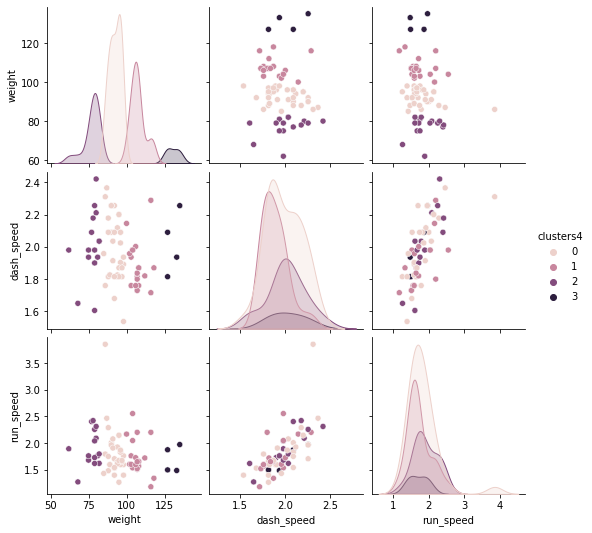

In [66]:
sns.pairplot(df, vars = ["weight", "dash_speed", "run_speed"], hue = "clusters4")

In [57]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
kmeans_scaled4 = KMeans(n_clusters = 4)
kmeans_scaled4.fit(x_scaled)
clusters_scaled4 = kmeans_scaled4.predict(x_scaled)

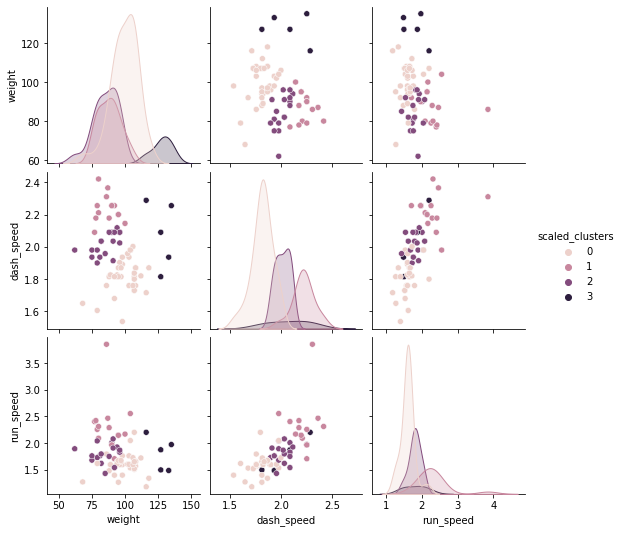

In [54]:
df["scaled_clusters4"] = clusters_scaled4
sns.pairplot(df, vars = ["weight", "dash_speed", "run_speed"], hue = "scaled_clusters4")

In [46]:
inertia_list = []
for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans_clusters = kmeans.fit_predict(x_scaled)
    inertia_list.append(kmeans.inertia_)

Text(0, 0.5, 'inertia')

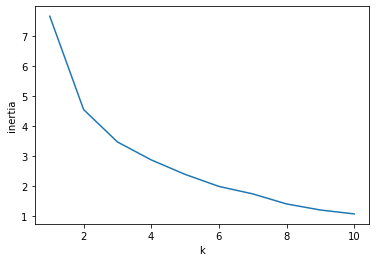

In [47]:
plt.plot(range(1,11),inertia_list)
plt.xlabel("k")
plt.ylabel("inertia")

In [51]:
silhouette_score_list = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k)
    kmeans_clusters = kmeans.fit_predict(x_scaled)
    score = silhouette_score(x_scaled,kmeans_clusters)
    silhouette_score_list.append(score)

Text(0, 0.5, 'Silhouette score')

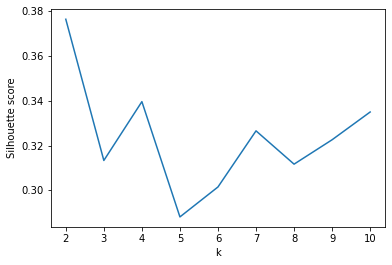

In [52]:
plt.plot(range(2,11), silhouette_score_list)
plt.xlabel("k")
plt.ylabel("Silhouette score")

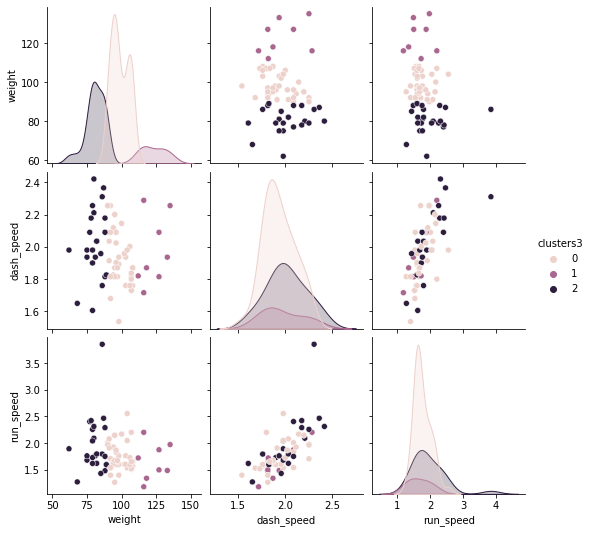

In [67]:
kmeans3 = KMeans(n_clusters = 3)
kmeans3.fit(x)
clusters3 = kmeans3.predict(x)
df["clusters3"] = clusters3
sns.pairplot(df, vars = ["weight", "dash_speed", "run_speed"], hue = "clusters3")

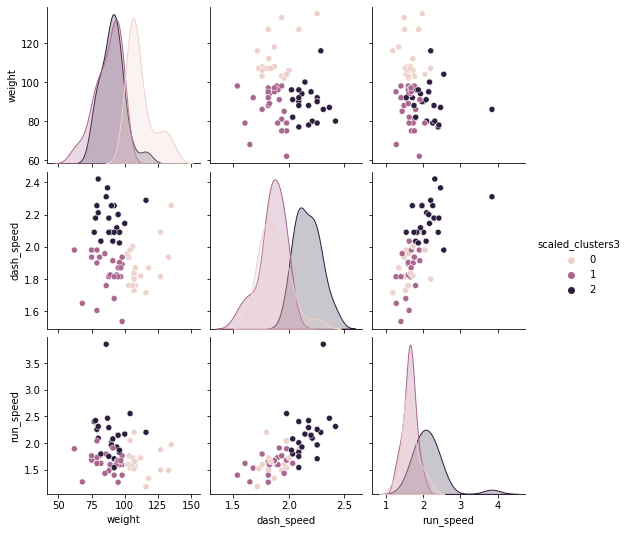

In [68]:
kmeans_scaled3 = KMeans(n_clusters = 3)
kmeans_scaled3.fit(x_scaled)
clusters_scaled3 = kmeans_scaled3.predict(x_scaled)
df["scaled_clusters3"] = clusters_scaled3
sns.pairplot(df, vars = ["weight", "dash_speed", "run_speed"], hue = "scaled_clusters3")